In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Иницилизация

In [54]:
a,b = 0,1
n = 100
const = n * 1000
t = np.linspace(a,b,n)
s = np.linspace(a,b,n)
x = np.linspace(a,b,n)
alpha = 1e-6
eps = 0.001
s_const = 1
right_side = np.full(n,np.NAN)
left_side = np.full((n,n),np.NAN)
real_one = np.full(n,np.NAN)
right_side_new = np.full(const,np.NAN,dtype=np.ndarray)
A = np.ones(n)
A[0],A[n - 1] = 0.5,0.5
h = (b - a) / (n - 1)

In [55]:
for i in range(n):
    real_one[i] = np.sin(x[i])

In [56]:
def G_star_ts(t: float,s: float):
    if s > t:
        return (1 / (4 * (-np.exp(4) + 2 * np.exp(2) - 1))) * (np.exp(2 + t - s) * s - np.exp(2 + t - s) * t + np.exp(4 - t - s) * s + np.exp(4 - t - s) * t + np.exp(2 - t + s) * s - np.exp(2 - t + s) * t + np.exp(s + t) * s + np.exp(s + t) * t - np.exp(2 + s + t) * s - np.exp(2 + s + t) * t - np.exp(s - t) * s + np.exp(s - t) * t - np.exp(t + 4 - s) * s + np.exp(t + 4 - s) * t - np.exp(2 - t - s) * s - np.exp(2 - t - s) * t - np.exp(2 + t - s) + np.exp(4 - t - s) - 3 * np.exp(2 - t + s) - np.exp(s + t) + 3 * np.exp(2 + s + t) + np.exp(s - t) - np.exp(t + 4 - s) + np.exp(2 - t - s))
    else:
        return (1 / (4 * (np.exp(4) - 2 * np.exp(2) + 1))) * (np.exp(2 + t - s) * s - np.exp(2 + t - s) * t - np.exp(4 - t - s) * s - np.exp(4 - t - s) * t + np.exp(2 - t + s) * s - np.exp(2 - t + s) * t - np.exp(s + t) * s - np.exp(s + t) * t + np.exp(2 + s + t) * s + np.exp(2 + s + t) * t - np.exp(4 - t + s) * s + np.exp(4 - t + s) * t - np.exp(t - s) * s + np.exp(t - s) * t + np.exp(2 - t - s) * s + np.exp(2 - t - s) * t + 3 * np.exp(2 + t - s) - np.exp(4 - t - s) + np.exp(2 - t + s) + np.exp(s + t) - 3 * np.exp(2 + s + t) + np.exp(4 - t + s) - np.exp(t - s) - np.exp(2 - t - s))

In [57]:
def y_star(t: float):
    return (1 / (4 * (np.exp(4) - 2 * np.exp(2) + 1))) * (np.sin(t) * np.exp(4) + np.sin(1) * t * np.exp(3 + t) + np.sin(1) * t * np.exp(3 - t) - np.sin(1) * t * np.exp(1 + t) - np.sin(1) * t * np.exp(1 - t) - np.sin(t) * 2 * np.exp(2) - np.sin(1) * 2 * np.exp(3 + t) + np.sin(1) * 2 * np.exp(3 - t) + np.sin(t))


In [58]:
def norma_L2(f: np.ndarray):
    sum = 0
    for i in range(1, n-1):
        sum += (np.abs(f[i]) ** 2)
    sum *= 2
    sum += (np.abs(f[0]) ** 2) + (np.abs(f[n-1]) ** 2)
    return np.sqrt((h/2) * sum)

In [59]:
for i in range(n):
    right_side[i] = y_star(t[i])
right_side_new[0] = right_side

In [60]:
for i in range(n):
    for j in range(n):
        left_side[i,j] = h * A[j] * G_star_ts(t[i],s[j])

In [61]:
for i in range(const -1):
    right_side_new[i+1] = right_side_new[i] + s_const * (right_side - np.dot(left_side,right_side_new[i]))
     

In [62]:
# for_graph = np.full(n,np.nan)
# for i in range(n):
#     for_graph[i] = np.max(np.abs(right_side_new[i] - real_one))
for_graph = np.full(const,np.nan)
# for i in range(const):
#     for_graph[i] = np.abs(norma_L2(right_side_new[i] - real_one))
for i in range(const):
    for_graph[i] = np.abs(np.linalg.norm(right_side_new[i] - real_one))

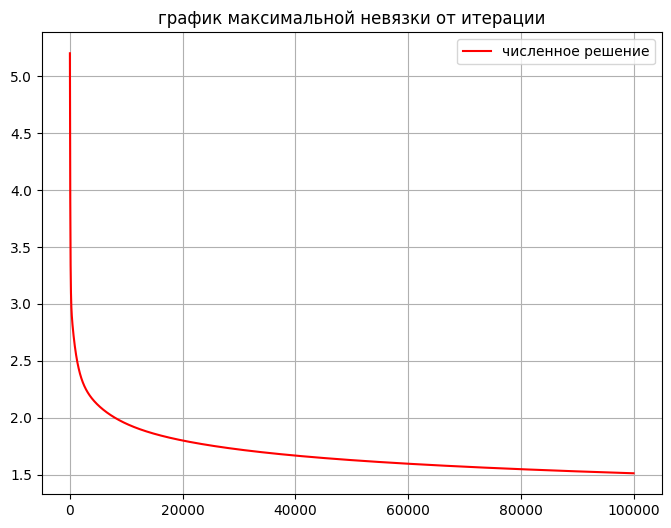

In [63]:
plt.figure(figsize=(8, 6))
plt.title(f'график максимальной невязки от итерации')
# plt.plot(np.linspace(0,99,100),for_graph,label = 'численное решение',color = 'red')
plt.plot(for_graph,label = 'численное решение',color = 'red')
# plt.plot(x,real_one,label = 'точное решение',color = 'blue')
plt.grid(True)
plt.legend()

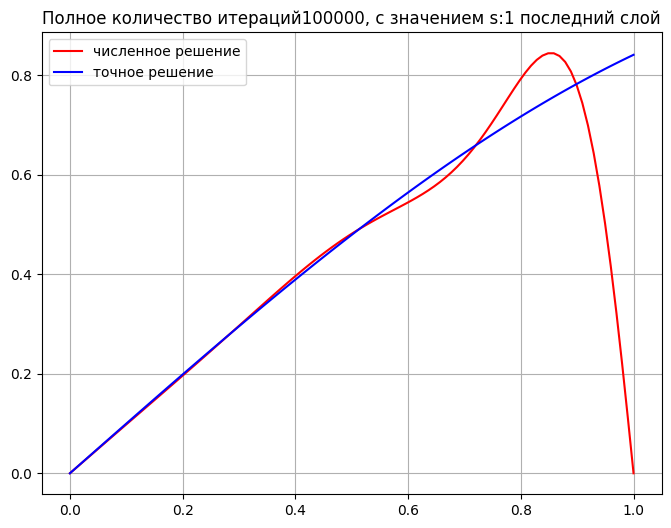

In [64]:
plt.figure(figsize=(8, 6))
plt.title(f'Полное количество итераций{const}, с значением s:{s_const} последний слой')
plt.plot(x,right_side_new[-1],label = 'численное решение',color = 'red')
plt.plot(x,real_one,label = 'точное решение',color = 'blue')
plt.grid(True)
plt.legend()

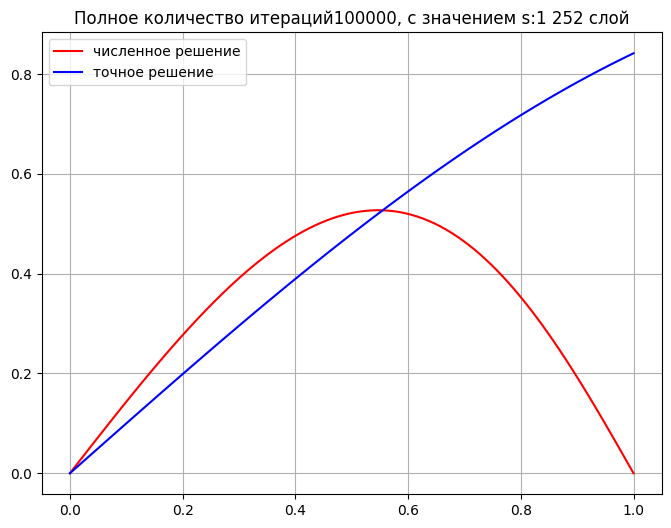

In [65]:
plt.figure(figsize=(8, 6))
plt.title(f'Полное количество итераций{const}, с значением s:{s_const} 252 слой')
plt.plot(x,right_side_new[252],label = 'численное решение',color = 'red')
plt.plot(x,real_one,label = 'точное решение',color = 'blue')
plt.grid(True)
plt.legend()

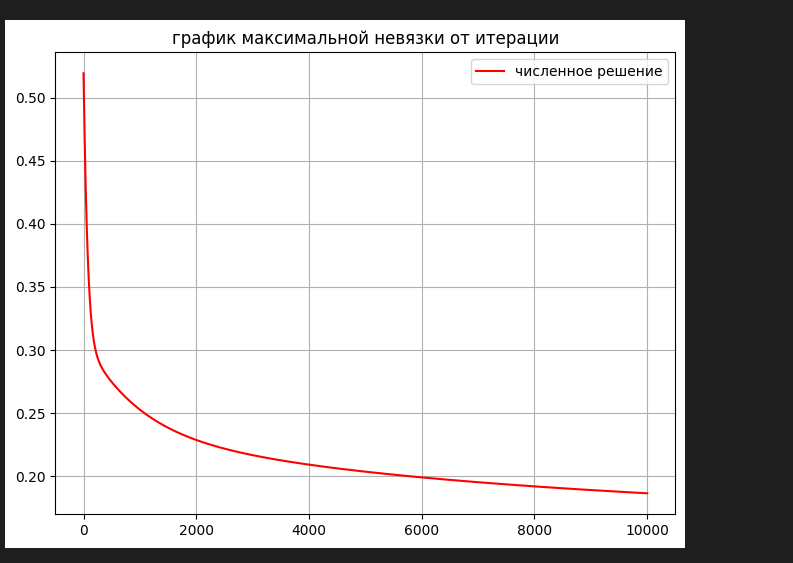
s_const = 1 n = 100 * 100

In [68]:
right_side

array([ 0.00000000e+00,  1.51080825e-04,  3.02030751e-04,  4.52718957e-04,
        6.03014775e-04,  7.52787767e-04,  9.01907804e-04,  1.05024514e-03,
        1.19767049e-03,  1.34405511e-03,  1.48927088e-03,  1.63319034e-03,
        1.77568684e-03,  1.91663455e-03,  2.05590858e-03,  2.19338504e-03,
        2.32894110e-03,  2.46245511e-03,  2.59380664e-03,  2.72287657e-03,
        2.84954720e-03,  2.97370225e-03,  3.09522703e-03,  3.21400843e-03,
        3.32993509e-03,  3.44289739e-03,  3.55278760e-03,  3.65949990e-03,
        3.76293052e-03,  3.86297776e-03,  3.95954209e-03,  4.05252628e-03,
        4.14183537e-03,  4.22737687e-03,  4.30906076e-03,  4.38679960e-03,
        4.46050859e-03,  4.53010570e-03,  4.59551167e-03,  4.65665019e-03,
        4.71344790e-03,  4.76583450e-03,  4.81374284e-03,  4.85710900e-03,
        4.89587236e-03,  4.92997570e-03,  4.95936526e-03,  4.98399085e-03,
        5.00380592e-03,  5.01876764e-03,  5.02883700e-03,  5.03397886e-03,
        5.03416208e-03,  

# Реализация с шумом

In [286]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt

In [287]:
a,b = 0,1
n = 100
const = n * 100
t = np.linspace(a,b,n)
s = np.linspace(a,b,n)
x = np.linspace(a,b,n)
alpha = 1e-6
eps = 0.1
s_const = 117
right_side = np.full(n,np.NAN)
left_side = np.full((n,n),np.NAN)
real_one = np.full(n,np.NAN)
right_side_new = np.full(const,np.NAN,dtype=np.ndarray)
A = np.ones(n)
A[0],A[n - 1] = 0.5,0.5
h = (b - a) / (n - 1)

In [288]:
def G_star_ts(t: float,s: float):
    if s > t:
        return (1 / (4 * (-np.exp(4) + 2 * np.exp(2) - 1))) * (np.exp(2 + t - s) * s - np.exp(2 + t - s) * t + np.exp(4 - t - s) * s + np.exp(4 - t - s) * t + np.exp(2 - t + s) * s - np.exp(2 - t + s) * t + np.exp(s + t) * s + np.exp(s + t) * t - np.exp(2 + s + t) * s - np.exp(2 + s + t) * t - np.exp(s - t) * s + np.exp(s - t) * t - np.exp(t + 4 - s) * s + np.exp(t + 4 - s) * t - np.exp(2 - t - s) * s - np.exp(2 - t - s) * t - np.exp(2 + t - s) + np.exp(4 - t - s) - 3 * np.exp(2 - t + s) - np.exp(s + t) + 3 * np.exp(2 + s + t) + np.exp(s - t) - np.exp(t + 4 - s) + np.exp(2 - t - s))
    else:
        return (1 / (4 * (np.exp(4) - 2 * np.exp(2) + 1))) * (np.exp(2 + t - s) * s - np.exp(2 + t - s) * t - np.exp(4 - t - s) * s - np.exp(4 - t - s) * t + np.exp(2 - t + s) * s - np.exp(2 - t + s) * t - np.exp(s + t) * s - np.exp(s + t) * t + np.exp(2 + s + t) * s + np.exp(2 + s + t) * t - np.exp(4 - t + s) * s + np.exp(4 - t + s) * t - np.exp(t - s) * s + np.exp(t - s) * t + np.exp(2 - t - s) * s + np.exp(2 - t - s) * t + 3 * np.exp(2 + t - s) - np.exp(4 - t - s) + np.exp(2 - t + s) + np.exp(s + t) - 3 * np.exp(2 + s + t) + np.exp(4 - t + s) - np.exp(t - s) - np.exp(2 - t - s))

In [289]:
# for i in range(n):
#     real_one[i] = np.sin(x[i])
    
# def phi(s: float) -> float:
#     # return ((1/2) * (np.exp(s-1) - np.exp(-s + 1))) * np.exp(1) / (np.exp(s) * np.exp(-s+1) - np.exp(-s) * np.exp(s-1))
#         return ((0.5) * (np.exp(s-1) - np.exp(-s + 1)) * np.exp(1)) / (np.exp(2) - 1)

# def theta(s: float) -> float:
#     # return ((1/2) * (np.exp(s) - np.exp(-s))) / (np.exp(s) * np.exp(-s+1) - np.exp(-s) * np.exp(s-1))
#     return ((0.5) * (np.exp(s) - np.exp(-s)) * np.exp(1)) / (np.exp(2) - 1)

# def y(x: float,eps: float) -> float:
#     return (1 + eps * (2 * np.random.uniform(0,1,1)[0] - 1)) * (-0.5 * (np.sin(x) * np.exp(2) + np.sin(1) * np.exp(-x + 1) - np.sin(1) * np.exp(x + 1) - np.sin(x))) / (np.exp(2) - 1)

# def y_star(t: float) -> float:
#     sum = 0
#     for i in range(1, n-1):
#         if x[i] < t:
#             sum += phi(t) * (np.exp(x[i]) - np.exp(-x[i])) * y(x[i],eps)
#             # sum += theta(t) * (np.exp(x[i] - 1) - np.exp(-x[i] + 1)) * y(x[i])
#         else:
#             # sum += phi(t) * (np.exp(x[i]) - np.exp(-x[i])) * y(x[i])
#             sum += theta(t) * (np.exp(x[i] - 1) - np.exp(-x[i] + 1)) * y(x[i],eps)
#     sum *= 2
#     sum += phi(t) * (np.exp(x[0]) - np.exp(-x[0])) * y(x[0],eps) + \
#         theta(t) * (np.exp(x[n-1] - 1) - np.exp(-x[n-1] + 1)) * y(x[n-1],eps)
#     return (h/2) * sum

In [290]:
for i in range(n):
    real_one[i] = np.sin(x[i])
    
def phi(s: float) -> float:
    # return ((1/2) * (np.exp(s-1) - np.exp(-s + 1))) * np.exp(1) / (np.exp(s) * np.exp(-s+1) - np.exp(-s) * np.exp(s-1))
        return ((0.5) * (np.exp(s-1) - np.exp(-s + 1)) * np.exp(1)) / (np.exp(2) - 1)

def theta(s: float) -> float:
    # return ((1/2) * (np.exp(s) - np.exp(-s))) / (np.exp(s) * np.exp(-s+1) - np.exp(-s) * np.exp(s-1))
    return ((0.5) * (np.exp(s) - np.exp(-s)) * np.exp(1)) / (np.exp(2) - 1)

def okok(x: float,eps: float) -> float:
    return (1 + eps * (2 * np.random.uniform(0,1,1)[0] - 1)) * (-0.5 * (np.sin(x) * np.exp(2) + np.sin(1) * np.exp(-x + 1) - np.sin(1) * np.exp(x + 1) - np.sin(x))) / (np.exp(2) - 1)
y = np.full(n,np.nan)
for i in range(n):
    y[i] = okok(x[i],eps)
def y_star(t: float) -> float:
    sum = 0
    for i in range(1, n-1):
        if x[i] < t:
            sum += phi(t) * (np.exp(x[i]) - np.exp(-x[i])) * y[i]
            # sum += theta(t) * (np.exp(x[i] - 1) - np.exp(-x[i] + 1)) * y(x[i])
        else:
            # sum += phi(t) * (np.exp(x[i]) - np.exp(-x[i])) * y(x[i])
            sum += theta(t) * (np.exp(x[i] - 1) - np.exp(-x[i] + 1)) * y[i]
    sum *= 2
    sum += phi(t) * (np.exp(x[0]) - np.exp(-x[0])) * y[0] + \
        theta(t) * (np.exp(x[n-1] - 1) - np.exp(-x[n-1] + 1)) * y[n-1]
    return (h/2) * sum

In [291]:
def norma_L2(f: np.ndarray):
    sum = 0
    for i in range(1, n-1):
        sum += (np.abs(f[i]) ** 2)
    sum *= 2
    sum += (np.abs(f[0]) ** 2) + (np.abs(f[n-1]) ** 2)
    return np.sqrt((h/2) * sum)

In [292]:
def y_star1(t: float):
    return (1 / (4 * (np.exp(4) - 2 * np.exp(2) + 1))) * (np.sin(t) * np.exp(4) + np.sin(1) * t * np.exp(3 + t) + np.sin(1) * t * np.exp(3 - t) - np.sin(1) * t * np.exp(1 + t) - np.sin(1) * t * np.exp(1 - t) - np.sin(t) * 2 * np.exp(2) - np.sin(1) * 2 * np.exp(3 + t) + np.sin(1) * 2 * np.exp(3 - t) + np.sin(t))

In [293]:
right_side1=np.full(n,np.nan)

In [294]:
for i in range(n):
    right_side1[i] = y_star1(t[i])

In [295]:
for i in range(n):
    right_side[i] = y_star(t[i])
right_side_new[0] = right_side

In [296]:
for i in range(n):
    for j in range(n):
        left_side[i,j] = h * A[j] * G_star_ts(t[i],s[j])

In [297]:
for i in range(const -1):
    # right_side_new[i+1] = right_side_new[i] + s_const * (right_side - np.dot(left_side,right_side_new[i]))
    right_side_new[i+1] = right_side_new[i] + s_const * (right_side - np.matmul(left_side,right_side_new[i]))

In [298]:
# for_graph = np.full(n,np.nan)
# for i in range(n):
#     for_graph[i] = np.max(np.abs(right_side_new[i] - real_one))
for_graph = np.full(const,np.nan)
# for i in range(const):
#     for_graph[i] = np.abs(norma_L2(right_side_new[i] - real_one))
for i in range(const):
    for_graph[i] = np.abs(np.linalg.norm(right_side_new[i] - real_one))

In [299]:
np.argmin(for_graph)

258

In [300]:
np.linalg.norm(left_side)

0.008486932894414212

In [301]:
1 / 0.008486932894414212

117.8281968811328

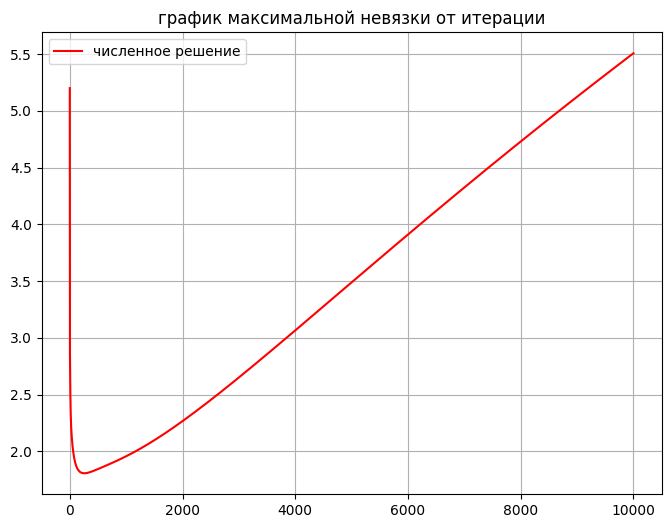

In [302]:
plt.figure(figsize=(8, 6))
plt.title(f'график максимальной невязки от итерации')
# plt.plot(np.linspace(0,99,100),for_graph,label = 'численное решение',color = 'red')
plt.plot(for_graph,label = 'численное решение',color = 'red')
# plt.plot(x,real_one,label = 'точное решение',color = 'blue')
plt.grid(True)
plt.legend()

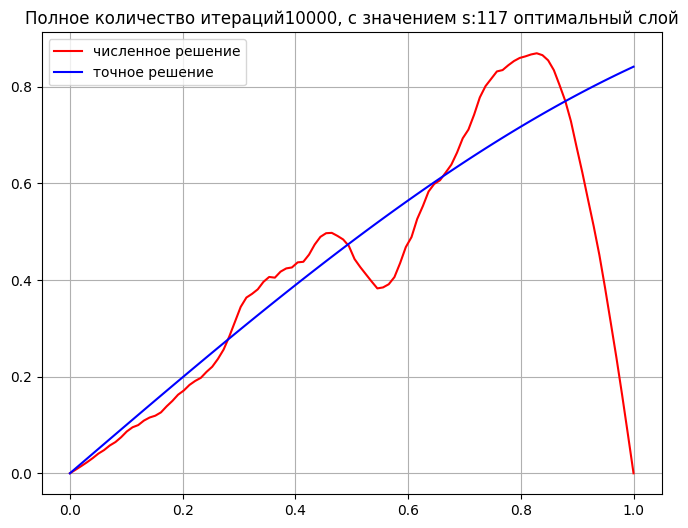

In [305]:
plt.figure(figsize=(8, 6))
plt.title(f'Полное количество итераций{const}, с значением s:{s_const} оптимальный слой')
plt.plot(x,right_side_new[258],label = 'численное решение',color = 'red')
plt.plot(x,real_one,label = 'точное решение',color = 'blue')
plt.grid(True)
plt.legend()

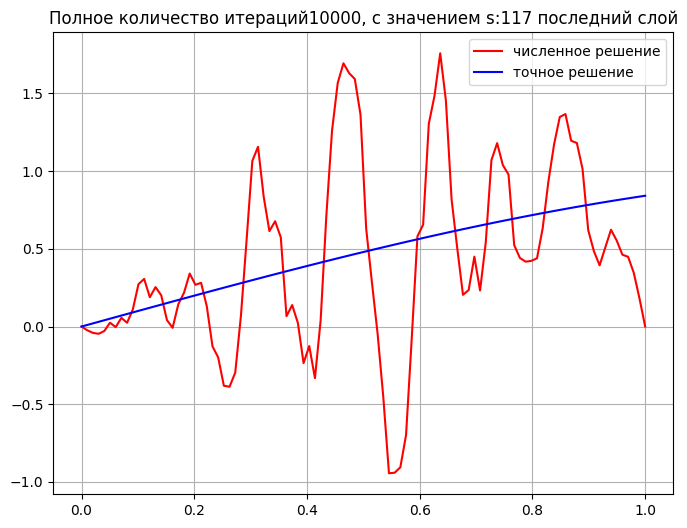

In [306]:
plt.figure(figsize=(8, 6))
plt.title(f'Полное количество итераций{const}, с значением s:{s_const} последний слой')
plt.plot(x,right_side_new[-1],label = 'численное решение',color = 'red')
plt.plot(x,real_one,label = 'точное решение',color = 'blue')
plt.grid(True)
plt.legend()

In [259]:
right_side - right_side1

array([ 0.00000000e+00, -1.11443920e-09, -2.17438511e-09, -3.46607727e-09,
       -4.50153908e-09, -5.33900134e-09, -6.81994002e-09, -7.91490158e-09,
       -9.95637237e-09, -1.20016718e-08, -1.34251335e-08, -1.49839145e-08,
       -1.57860167e-08, -1.58719233e-08, -1.60417388e-08, -1.71654499e-08,
       -1.83002794e-08, -1.96075623e-08, -2.29658662e-08, -2.51964133e-08,
       -2.79417989e-08, -2.98458584e-08, -3.08901702e-08, -3.08498404e-08,
       -2.84627292e-08, -2.57419767e-08, -2.34784852e-08, -1.79811034e-08,
       -1.55460267e-08, -1.66209114e-08, -1.46281907e-08, -1.17555236e-08,
       -7.92662818e-09, -4.66894489e-09, -2.17489584e-09,  7.92925925e-10,
        6.68578599e-09,  1.62524403e-08,  2.93457292e-08,  4.56049966e-08,
        6.36549792e-08,  8.53415936e-08,  1.01771409e-07,  1.20197305e-07,
        1.42424483e-07,  1.63788603e-07,  1.83102276e-07,  2.00592451e-07,
        2.13477623e-07,  2.21426856e-07,  2.28781413e-07,  2.39230691e-07,
        2.47363864e-07,  

# Реализация 3(обрезание решения)

In [ ]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
a,b = 0,1
n = 100
const = n * 1000
t = np.linspace(a,b,n)
s = np.linspace(a,b,n)
x = np.linspace(a,b,n)
alpha = 1e-6
eps = 0.1
s_const = 1
right_side = np.full(n,np.NAN)
left_side = np.full((n,n),np.NAN)
real_one = np.full(n,np.NAN)
right_side_new = np.full(const,np.NAN,dtype=np.ndarray)
A = np.ones(n)
A[0],A[n - 1] = 0.5,0.5
h = (b - a) / (n - 1)

In [ ]:
def G_star_ts(t: float,s: float):
    if s > t:
        return (1 / (4 * (-np.exp(4) + 2 * np.exp(2) - 1))) * (np.exp(2 + t - s) * s - np.exp(2 + t - s) * t + np.exp(4 - t - s) * s + np.exp(4 - t - s) * t + np.exp(2 - t + s) * s - np.exp(2 - t + s) * t + np.exp(s + t) * s + np.exp(s + t) * t - np.exp(2 + s + t) * s - np.exp(2 + s + t) * t - np.exp(s - t) * s + np.exp(s - t) * t - np.exp(t + 4 - s) * s + np.exp(t + 4 - s) * t - np.exp(2 - t - s) * s - np.exp(2 - t - s) * t - np.exp(2 + t - s) + np.exp(4 - t - s) - 3 * np.exp(2 - t + s) - np.exp(s + t) + 3 * np.exp(2 + s + t) + np.exp(s - t) - np.exp(t + 4 - s) + np.exp(2 - t - s))
    else:
        return (1 / (4 * (np.exp(4) - 2 * np.exp(2) + 1))) * (np.exp(2 + t - s) * s - np.exp(2 + t - s) * t - np.exp(4 - t - s) * s - np.exp(4 - t - s) * t + np.exp(2 - t + s) * s - np.exp(2 - t + s) * t - np.exp(s + t) * s - np.exp(s + t) * t + np.exp(2 + s + t) * s + np.exp(2 + s + t) * t - np.exp(4 - t + s) * s + np.exp(4 - t + s) * t - np.exp(t - s) * s + np.exp(t - s) * t + np.exp(2 - t - s) * s + np.exp(2 - t - s) * t + 3 * np.exp(2 + t - s) - np.exp(4 - t - s) + np.exp(2 - t + s) + np.exp(s + t) - 3 * np.exp(2 + s + t) + np.exp(4 - t + s) - np.exp(t - s) - np.exp(2 - t - s))

In [ ]:
for i in range(n):
    real_one[i] = np.sin(x[i])
    
def phi(s: float) -> float:
    # return ((1/2) * (np.exp(s-1) - np.exp(-s + 1))) * np.exp(1) / (np.exp(s) * np.exp(-s+1) - np.exp(-s) * np.exp(s-1))
        return ((0.5) * (np.exp(s-1) - np.exp(-s + 1)) * np.exp(1)) / (np.exp(2) - 1)

def theta(s: float) -> float:
    # return ((1/2) * (np.exp(s) - np.exp(-s))) / (np.exp(s) * np.exp(-s+1) - np.exp(-s) * np.exp(s-1))
    return ((0.5) * (np.exp(s) - np.exp(-s)) * np.exp(1)) / (np.exp(2) - 1)

def okok(x: float,eps: float) -> float:
    return (1 + eps * (2 * np.random.uniform(0,1,1)[0] - 1)) * (-0.5 * (np.sin(x) * np.exp(2) + np.sin(1) * np.exp(-x + 1) - np.sin(1) * np.exp(x + 1) - np.sin(x))) / (np.exp(2) - 1)
y = np.full(n,np.nan)
for i in range(n):
    y[i] = okok(x[i],eps)
def y_star(t: float) -> float:
    sum = 0
    for i in range(1, n-1):
        if x[i] < t:
            sum += phi(t) * (np.exp(x[i]) - np.exp(-x[i])) * y[i]
            # sum += theta(t) * (np.exp(x[i] - 1) - np.exp(-x[i] + 1)) * y(x[i])
        else:
            # sum += phi(t) * (np.exp(x[i]) - np.exp(-x[i])) * y(x[i])
            sum += theta(t) * (np.exp(x[i] - 1) - np.exp(-x[i] + 1)) * y[i]
    sum *= 2
    sum += phi(t) * (np.exp(x[0]) - np.exp(-x[0])) * y[0] + \
        theta(t) * (np.exp(x[n-1] - 1) - np.exp(-x[n-1] + 1)) * y[n-1]
    return (h/2) * sum

In [ ]:
def norma_L2(f: np.ndarray):
    sum = 0
    for i in range(1, 70):
        sum += (np.abs(f[i]) ** 2)
    sum *= 2
    sum += (np.abs(f[0]) ** 2) + (np.abs(f[69]) ** 2)
    return np.sqrt((h/2) * sum)

In [ ]:
for i in range(n):
    right_side[i] = y_star(t[i])
right_side_new[0] = right_side

In [ ]:
for i in range(n):
    for j in range(n):
        left_side[i,j] = h * A[j] * G_star_ts(t[i],s[j])

In [ ]:
for i in range(const -1):
    right_side_new[i+1] = right_side_new[i] + s_const * (right_side - np.dot(left_side,right_side_new[i]))
     

In [ ]:
# for_graph = np.full(n,np.nan)
# for i in range(n):
#     for_graph[i] = np.max(np.abs(right_side_new[i] - real_one))
for_graph = np.full(const,np.nan)
for i in range(const):
    for_graph[i] = np.abs(norma_L2(right_side_new[i][0:70] - real_one[0:70]))
# for i in range(const):
#     for_graph[i] = np.abs(np.linalg.norm(right_side_new[i][0:50] - real_one[0:50]))
# for i in range(const):
#     for_graph[i] = np.abs(np.linalg.norm(right_side_new[i] - real_one))

In [ ]:
plt.figure(figsize=(8, 6))
plt.title(f'график максимальной невязки от итерации')
# plt.plot(np.linspace(0,99,100),for_graph,label = 'численное решение',color = 'red')
plt.plot(for_graph,label = 'численное решение',color = 'red')
# plt.plot(x,real_one,label = 'точное решение',color = 'blue')
plt.grid(True)
plt.legend()

In [ ]:
plt.figure(figsize=(8, 6))
plt.title(f'Полное количество итераций{const}, с значением s:{s_const} последний слой')
plt.plot(x,right_side_new[-1],label = 'численное решение',color = 'red')
plt.plot(x,real_one,label = 'точное решение',color = 'blue')
plt.grid(True)
plt.legend()

In [ ]:
plt.figure(figsize=(8, 6))
plt.title(f'Полное количество итераций{const}, с значением s:{s_const} последний слой')
plt.plot(x[0:70],right_side_new[-1][0:70],label = 'численное решение',color = 'red')
plt.plot(x,real_one,label = 'точное решение',color = 'blue')
plt.grid(True)
plt.legend()

In [ ]:
plt.figure(figsize=(8, 6))
plt.title(f'Полное количество итераций{const}, с значением s:{s_const} последний слой')
plt.plot(x[0:70],right_side_new[5000][0:70],label = 'численное решение',color = 'red')
plt.plot(x,real_one,label = 'точное решение',color = 'blue')
plt.grid(True)
plt.legend()

In [ ]:
plt.figure(figsize=(8, 6))
plt.title(f'Полное количество итераций{const}, с значением s:{s_const} последний слой')
plt.plot(x,right_side_new[250],label = 'численное решение',color = 'red')
plt.plot(x,real_one,label = 'точное решение',color = 'blue')
plt.grid(True)
plt.legend()

In [ ]:
right_side_new[0][0:70]